In [1]:
import pandas as pd
import sklearn as st


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv("chicago_taxi_train.csv")

In [5]:
corr=df.corr(numeric_only=True)
fare_corr=(corr['FARE'].sort_values(ascending=False))

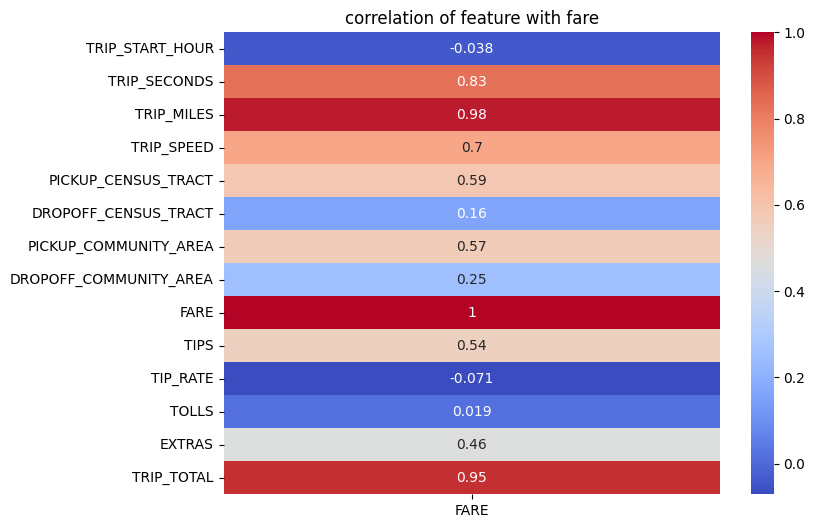

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(corr[['FARE']],annot=True,cmap='coolwarm')
plt.title("correlation of feature with fare")
plt.show()

In [7]:
features=fare_corr.drop(['FARE','TRIP_TOTAL']).head(2).index.tolist()
print(features)

['TRIP_MILES', 'TRIP_SECONDS']


In [8]:
X=df[features]
y=df['FARE']

In [9]:
X=X.dropna()
y=y.loc[X.index]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

In [12]:
rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 15.045397976597272
R²: 0.9491373225719297


In [15]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)